In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

In [2]:
data = pd.read_csv('wine.data', index_col=False, header=None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data.set_axis(
    axis=1,
    labels=['type',
            'alcohol',
            'malic_acid',
            'ash',
            'alcalinity_of_ash',
            'magnesium',
            'total_phenols',
            'flavanoids',
            'nonflavanoid_phenols',
            'proanthocyanins',
            'color_intensity',
            'hue',
            'OD280/OD315_of_diluted_wines',
            'proline'],
    inplace = True)

In [5]:
X = data.iloc[:, 1:14]
Y = data['type']

In [6]:
X_sc = scale(X)
X_sc = pd.DataFrame(X_sc, columns = X.columns)

In [7]:
from sklearn.model_selection import KFold

In [8]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [9]:
k_scores = []
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    quality_scores = cross_val_score(knn, X, Y, cv=kf, scoring='accuracy')
    k_scores.append(quality_scores.mean())
print(k_scores)

[0.7304761904761905, 0.6625396825396825, 0.7082539682539682, 0.6577777777777778, 0.6746031746031746, 0.6742857142857144, 0.68, 0.6799999999999999, 0.7023809523809523, 0.6801587301587302, 0.7025396825396826, 0.6966666666666667, 0.6909523809523809, 0.6793650793650794, 0.701904761904762, 0.6795238095238096, 0.7015873015873015, 0.6795238095238095, 0.6793650793650793, 0.6909523809523809, 0.7019047619047619, 0.6965079365079364, 0.7020634920634921, 0.7076190476190476, 0.7019047619047619, 0.6965079365079365, 0.6963492063492064, 0.7079365079365079, 0.7134920634920634, 0.7079365079365079, 0.690952380952381, 0.7134920634920634, 0.7134920634920634, 0.7246031746031747, 0.7246031746031747, 0.7134920634920636, 0.7134920634920634, 0.7134920634920634, 0.7079365079365079, 0.7077777777777777, 0.7134920634920634, 0.7077777777777777, 0.7077777777777777, 0.7077777777777777, 0.7077777777777777, 0.7077777777777777, 0.6966666666666667, 0.7190476190476192, 0.6966666666666667, 0.7077777777777777]


In [10]:
#best result
round(max(k_scores), 2)

0.73

In [11]:
#which k gives best result
np.argmax(k_scores) + 1

1

Populating the interactive namespace from numpy and matplotlib


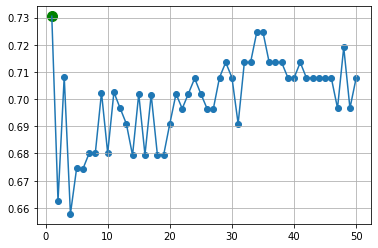

In [12]:
#let's visualize
%pylab inline
plt.plot(range(1, 51), k_scores)
plt.scatter(range(1, 51), k_scores)
best_point = np.argmax(k_scores)
plt.grid()
plt.scatter(best_point + 1, k_scores[best_point], c='g', s=100)

In [13]:
k_scores_sc = []
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    quality_scores = cross_val_score(knn, X_sc, Y, cv=kf, scoring='accuracy')
    k_scores_sc.append(quality_scores.mean())
print(k_scores_sc)

[0.943968253968254, 0.9328571428571429, 0.9550793650793651, 0.9382539682539683, 0.9493650793650794, 0.9495238095238095, 0.9495238095238095, 0.9552380952380952, 0.9607936507936508, 0.9607936507936508, 0.9609523809523809, 0.9552380952380952, 0.9495238095238093, 0.9663492063492063, 0.9720634920634922, 0.9720634920634922, 0.9665079365079364, 0.9665079365079364, 0.9553968253968254, 0.9665079365079364, 0.9609523809523811, 0.9665079365079364, 0.9609523809523809, 0.9552380952380952, 0.9552380952380952, 0.9607936507936508, 0.9552380952380952, 0.9663492063492063, 0.9776190476190475, 0.9607936507936508, 0.9552380952380952, 0.9607936507936508, 0.9663492063492063, 0.9663492063492063, 0.9607936507936508, 0.9607936507936508, 0.9552380952380952, 0.9607936507936508, 0.9607936507936508, 0.9607936507936508, 0.9663492063492063, 0.9607936507936508, 0.9663492063492063, 0.9606349206349206, 0.9663492063492063, 0.9495238095238095, 0.9550793650793651, 0.9495238095238095, 0.9550793650793651, 0.9606349206349206]


In [14]:
#best result for scaled data
round(max(k_scores_sc), 2)

0.98

In [15]:
np.argmax(k_scores_sc) + 1

29

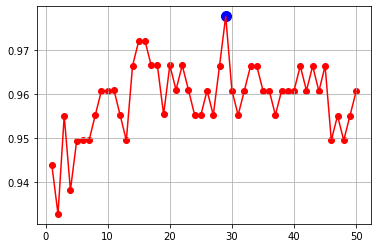

In [16]:
plt.plot(range(1, 51), k_scores_sc, color = 'r')
plt.scatter(range(1, 51), k_scores_sc, color = 'r')
best_point_sc = np.argmax(k_scores_sc)
plt.grid()
plt.scatter(best_point_sc + 1, k_scores_sc[best_point_sc], c='b', s=100)